# Analyzing Simulated Power Spectra

In this notebook will go over analyzing the simulated power spectra.

Note that this script covers how the simulated power spectra are analyzed, and plots some of the outputs. 

To re-run the actual analyses of the simulated data, use the scripts available in `/scripts`.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import custom project code
import sys
sys.path.append('../bratios')
from ratios import *
from settings import *
from paths import DATA_PATHS as dp
from paths import FIGS_PATHS as fp

## Analyze results from single parameter simulations

First we will start by analyzing the set of single parameter variation simulations that we generated in the prior notebook.

Recall that this data is a set of power spectra that vary across the power of the higher oscillation band.

In [3]:
# Load data from the prior notebook
pw_dat = np.load(dp.make_file_path(dp.demo, 'PW_DEMO', 'npy'))

In [4]:
# First we will extract the power values for each higher oscillation in the simulated spectra
pw_syns = []
for val in pw_dat[2]:
    pw_syns.append(val.gaussian_params[1][1])

In [5]:
# Calculate band ratios
pw_ratios = []
for pw in pw_dat[1]:
    pw_ratios.append(calc_band_ratio(pw_dat[0], pw, THETA_BAND, BETA_BAND))

In [6]:
# Collect measures together into a dataframe
pw_cols = np.array([pw_ratios, pw_syns]).T.tolist()
df_pw = pd.DataFrame(pw_cols, columns=["band_ratio", "power"])

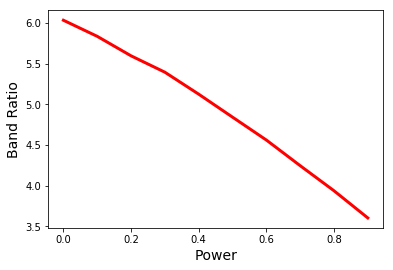

In [7]:
# Plot the calculated band ratio measures across the change in power
plt.plot(df_pw.power, df_pw.band_ratio, color='r', linewidth=3)
plt.xlabel("Power", {'fontsize' : 14})
plt.ylabel("Band Ratio", {'fontsize' : 14});

Recall that we varied the power of the higher band. Here we see that as power increases, the band ratio value decreases. This is consistent with expectation since band ratios are calculated as avg(low-band power)/ (high-band power). As the denominator increases, which is reflected by increasing the power of the higher band, band ratios decrease.

#### Plots for all single parameter simulations

The main analysis of all the different single parameter simulations is run by an external script. 

All the figures from those analyses are available in the `figures` folder. 

In [8]:
# Check all the figures available for single parameter simualations
fp.list_files('sims_single')

Files in the sims_single directory:
     aperiodic_ABR.pdf
     aperiodic_ABR.svg
     aperiodic_TAR.pdf
     aperiodic_TAR.svg
     aperiodic_TBR.pdf
     aperiodic_TBR.svg
     periodic_ABR.pdf
     periodic_ABR.svg
     periodic_TAR.pdf
     periodic_TAR.svg
     periodic_TBR.pdf
     periodic_TBR.svg


## Analyze results from interacting parameter simulations

In this next section, let's analyze some of the data from the interacting parameters simulations.

Recall in the prior notebook we simulated some test data with varying aperiodic exponent and oscillation power. 

Here let's examine how band ratio measures are affected when these two parameters change together.

In [9]:
# Load the simulated data from the prior notebooks
exp_pw_dat = np.load(dp.make_file_path(dp.demo, 'EXP_PW_DEMO', 'npy'))

In [10]:
# Here, we will step across the data, calculate band ratio measures, and collect the outputs 
data = []
for param in exp_pw_dat:
    
    inner_list = []
    freqs = param[1]

    for psd in param[2]:
    
        curr_ratio = calc_band_ratio(freqs, psd, THETA_BAND, BETA_BAND)
        inner_list.append(curr_ratio)

    data.append(inner_list)
    
data = np.array(data)

Now that we've collected the band ratio measures, let's plot the data. 

Since we are plotting across two dimensions (two parameters that vary), we'll use a heatmap.

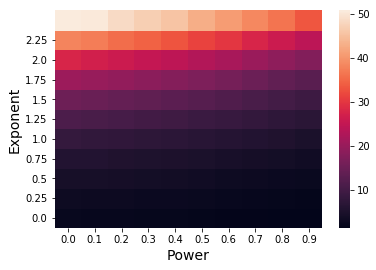

In [11]:
# Plot the calculate band ratio measures
ax = sns.heatmap(data, xticklabels=PWS, yticklabels=EXPS)

# Plot aesthetics
ax.invert_yaxis()
plt.xlabel("Power", {'fontsize' : 14})
plt.ylabel("Exponent", {'fontsize' : 14});

In the above plot, we see that changing exponent and/or power does change the measured band ratio value.

However, one thing that we might notice as well, that is also known about band ratio values, is that this plot has a skewed distribution, with a small number of values with a very high value. This makes it hard to see the pattern across the other values. 

To deal with this, next we'll plot the same data in log spacing.

## Plotting interacting parameters with logged ratios

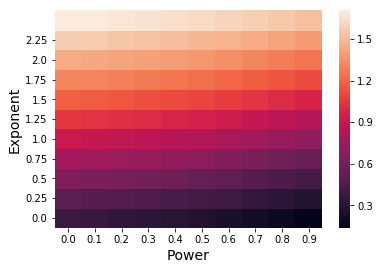

In [12]:
# Replot the data in log
logged_data =np.log10(data)
ax = sns.heatmap(logged_data, xticklabels=PWS, yticklabels=EXPS)

# Plot aesthetics
ax.invert_yaxis()
plt.xlabel("Power", {'fontsize' : 14})
plt.ylabel("Exponent", {'fontsize' : 14});

Consistent with the single parameter simulation we ran above, we can see that increasing power of the higher oscillation decreases measured band ratio, as expected. Looking up the y-axis, we can also see that increasing exponent value also impacts band ratio measures - in fact this looks like exponent has an even bigger effect. If you look across diagonal values, you can see how ratios change as both parameters change together. 

#### Plots for all interacting parameter simulations

The main analysis of all the different interacting parameter simulations is run by an external script. 

All the figures from those analyses are available in the `figures` folder. 

In [13]:
# Check all the figures available for single parameter simualations
fp.list_files('sims_interacting')

Files in the sims_interacting directory:
     exp_highbw_data.pdf
     exp_highcf_data.pdf
     exp_highpw_data.pdf
     exp_lowbw_data.pdf
     exp_lowcf_data.pdf
     exp_lowpw_data.pdf
     highcf_highbw_data.pdf
     highcf_highpw_data.pdf
     highcf_lowbw_data.pdf
     highcf_lowpw_data.pdf
     highpw_highbw_data.pdf
     highpw_lowbw_data.pdf
     lowbw_highbw_data.pdf
     lowcf_highbw_data.pdf
     lowcf_highcf_data.pdf
     lowcf_highpw_data.pdf
     lowcf_lowbw_data.pdf
     lowcf_lowpw_data.pdf
     lowpw_highbw_data.pdf
     lowpw_highpw_data.pdf
     lowpw_lowbw_data.pdf
